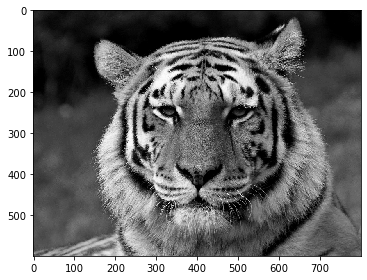

In [2]:
%matplotlib inline

from numpy import histogram
from skimage.io import imread, imshow, imsave

img = imread('C:\cs173\module2\img.png')
img = img.astype('float')
values, bin_edges = histogram(img, bins=range(257))
values_list = list(values)

for i in range(len(values_list)):
    if values_list[i] != 0 :
        x_min = i
        break

for i in range(x_min, len(values_list)):
    if values_list[i] == 0 :
        x_max = i
        break
 
img1 = (img - x_min) * 255 / (x_max - x_min)
img1 = img1.astype('uint8')
imsave('out_img.png', img1)
imshow(img1)

Подсчитать минимум и максимум яркости для стабильного автоконтраста изображения:

In [27]:
img = imread('C:\cs173\module2\img.png')
img = img.astype('float')

def find_min_max_bright(img):
    values, bin_edges = histogram(img, bins=range(257))
    values_list = list(values)
    k = round(img.shape[0] * img.shape[1] * 0.05)

    count = 0
    for i in range(256):
        count += values_list[i]
        if count > k:
            x_min = i
            break

    count = 0
    for i in range(256):
        count += values_list[255-i]
        if count > k:
            x_max = 255 - i
            break
    
    return x_min, x_max


x_min, x_max = find_min_max_bright(img)
print(x_min, x_max)

129 208


Устойчивый автоконтраст чёрно-белого изображения (учитывая, что минимальное и максимальное значение яркости уже найдены):

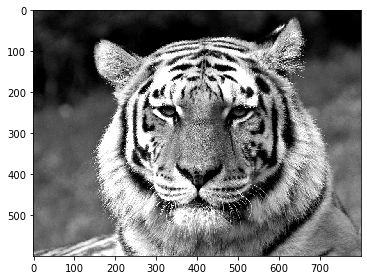

In [10]:
from numpy import clip

img1 = clip(((img - x_min) * 255 / (x_max - x_min)), 0, 255)
img1 = img1.astype('uint8')
imsave('out_img.png', img1)
imshow(img1)

Коррекция контрастности цветного изображения:

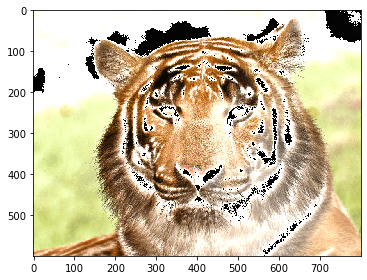

In [32]:
from skimage.util import img_as_float, img_as_ubyte
from numpy import dstack

img = imread('C:\cs173\module2\\tiger-color.png')
img = img_as_float(img)
r = img[:, :, 0]
g = img[:, :, 1]
b = img[:, :, 2]
y_channel = 0.2126 * r + 0.7152 * g + 0.0722 * b
u_channel = -0.0999 * r - 0.3360 * g + 0.4360 * b
v_channel = 0.6150 * r - 0.5586 * g - 0.0563 * b

y_channel = img_as_ubyte(clip(y_channel, 0, 1))

bright_min, bright_max = find_min_max_bright(y_channel)
y_channel1 = clip(((y_channel - bright_min) * 255 / (bright_max - bright_min)), 0, 255)
y_channel1 = img_as_float(y_channel1)

r1 = clip((y_channel1 + 1.2803 * v_channel), 0, 1)
g1 = clip((y_channel1 - 0.2148 * u_channel - 0.3805 * v_channel), 0, 1)
b1 = clip((y_channel1 + 2.1279 * u_channel), 0, 1)

img1 = dstack((r1, g1, b1,))
img1 = img_as_ubyte(img1)
imshow(img1)

Преобразование серого мира:

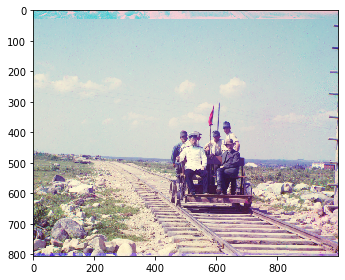

In [34]:
from numpy import average

img = imread('railroad.png')
img = img_as_float(img)
r_avg = average(img[:, :, 0])
g_avg = average(img[:, :, 1])
b_avg = average(img[:, :, 2])
avg = average([r_avg, g_avg, b_avg])
rw = r_avg / avg
gw = g_avg / avg
bw = b_avg / avg
r = img[:, :, 0] / rw
g = img[:, :, 1] / gw
b = img[:, :, 2] / bw
img_res = clip(dstack((r, g, b)), 0, 1)
imshow(img_res)

Выравнивание гистограммы:

In [ ]:
img = imread('landscape.png')
values, bin_edges = histogram(img, bins=range(257))
values_list = list(values)
x = img.shape[0]
y = img.shape[1]
size = x * y

def cdf(img, bright_num: int):
    """
    функция распределения
    bright_num:  кол-во уровей яркости"""
    values, bin_edges = histogram(img, bins=range(257))
    values_list = list(values)
    return sum(values_list[:bright_num])

for value in values_list:
    if value:
        cdf_min = value

for i in range(x):
    for j in range(y):
        img[i][j] = round((cdf(img, img[i][j]) - cdf_min) * 255 / (size - 1))

imshow(img)
